In [ ]:
# !pip install soundFile
# !pip install sounddevice


from quantif import quantif
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import math
from scipy.io import wavfile
import wave
import contextlib


With the conventional Fourier transform, we have the problem that we cannot analyze the frequencies temporally. We are not able to know in which moment of the signal the highest or lowest frequencies are located. For this, we use the Short-time Fourier transform.

For a better temporal analysis of the frequencies of the audio sound.wav, let's obtain its Short-time Fourier transform.
The first step for this is to take a time window of the signal, on which we will apply the conventional transform.

We have two main types of windows, the rectangular window and the hamming window.
For the rectangular window, we have exactly the value of the original signal for the respective values of the windowed signal, while for the hamming window, we have the original value multiplied by the respective value of the hamming function.

the objective of using the hamming window more frequently is given by the sudden drop in the signal that would be caused by the rectangular window. This sudden drop could result in the presence of higher frequencies in the Fourier transform.

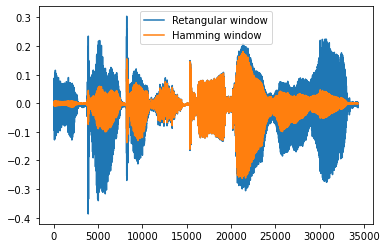

In [ ]:
# read sound file
document = 'sound.wav'
xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

x_length = len(xvect)
N_win = round(x_length/5)
N_hop = N_win/2

xvect_trame = xvect[round(2*N_win):round(2*N_win)+N_win]
hamming_win = np.hamming(N_win)

windowed_xvect = [x*hamming_win[i] for i, x in enumerate(xvect_trame)]

plt.plot(xvect_trame, label = "Retangular window")
plt.plot(windowed_xvect, label = "Hamming window") 

plt.legend()

with the hamming window, we can observe that we have a drop in the values of the frequencies due to the decrease of the more decentralized values of the windowed signal.

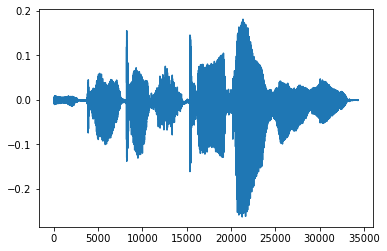

In [ ]:
# window_vect = [1 if debout < i < debut+N_win else 0 for i in range(len(xvect)) ]

# windowed_xvect = [x*y for x,y in zip(xvect, window_vect)]

sd.play(xvect, 15100)

plt.plot(windowed_xvect)


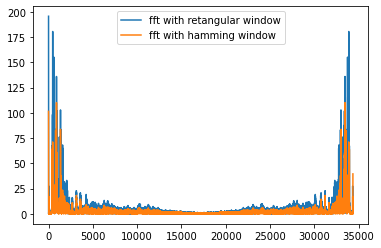

In [ ]:
from scipy.fft import fft

fft_xvect_trame = fft(xvect_trame)
fft_windowed_xvect = fft(windowed_xvect)
plt.plot(np.abs(fft_xvect_trame), label = "fft with retangular window")
plt.plot(np.abs(fft_windowed_xvect), label = "fft with hamming window")
plt.legend()

3. Transformée de Fourier à Court Terme (TFCT). On se propose de calculer les TFD de
chaque trame et de les ranger dans les L colonnes de xmat. Déclarer la matrice xmat de
TFCT initialement nulle, puis remplir ses colonnes.

The result of a short time fourier transform is a matrix where we will have the fourier transform for each windowed piece of our signal.

The horizontal axis refers to time values, each corresponding to a windowed interval, while the verticals correspond to frequencies.

The matrix elements are the presence of this frequency in the windowed time interval in question.

In [ ]:
def zeropad(array, length):
    
    len_dif = length - len(array)
    zero_array = np.zeros(len_dif)

    return np.concatenate((array, zero_array))

<built-in function len>
<built-in function len>
<built-in function len>


<ipython-input-30-22a684694373>:23: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(x_mat), aspect='auto', interpolation='none',)


<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>


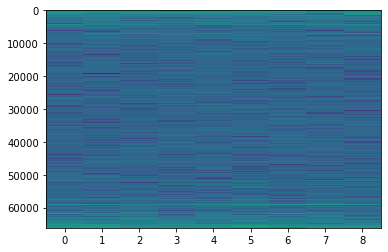

In [ ]:
x_length = len(xvect)
N_win = round(x_length/5)
N_hop = round(N_win/2)
N_fft = N_win
number_of_ffts = int(x_length/N_win)
number_of_ffts = int((x_length - abs(N_win - N_hop))// N_hop)

x_mat = np.zeros((N_fft,number_of_ffts))
hamming_win = np.hamming(N_win)

for i in range(number_of_ffts):
    
    xvect_trame = xvect[i*N_hop:i*N_hop + N_win]

    windowed_xvect = [x*hamming_win[i] for i, x in enumerate(xvect_trame)]
    
    zero_paddedwindowed_xvect = zeropad(windowed_xvect, N_fft)

    fft_zeropadded_windowed_xvect = fft(zero_paddedwindowed_xvect)
    
    x_mat[:,i-1] = np.transpose(np.abs(fft_zeropadded_windowed_xvect))
    
    plt.imshow(np.log10(x_mat), aspect='auto', interpolation='none',)

 

# print(x_mat)

4. Test et affichage. Tester l’algorithme tfct.py sur le fichier audio sound.wav. Tracer le
spectrogramme obtenu après calcul de la TFCT, à l’aide de la fonction python plt.imshow,
en prenant soin de représenter l’axe des temps en secondes et l’axe des fréquences en Hertz.

Joining all the steps performed above, we were able to create the function tfct(document, N_win, N_hop, N_fft), where "document" is the address of the audio file, "N_win" is the size of the Hamming window to be used, "N_hop" would be the time increment between two consecutive windowing and "N_fft", the amount of values that we want to use for the Fourier transform for each time interval, which must be at least the value of "N_win". 

The difference between "N_win" and "N_hop" is implemented by zeropadding the windowed signal, which is adding zeros to the end of it. The value of "N_fft" alters the result of the Fourier transform in some ways. We will understand these changes later on.

In [ ]:
def tfct(document, N_win, N_hop, N_fft):
    xvect = sf.read(document, dtype='float64')
    xvect = xvect[0]
    
    with contextlib.closing(wave.open(document,'r')) as f:
        rate = f.getframerate()

    x_length = len(xvect)
    number_of_ffts = int(x_length/N_hop)

    x_mat = np.zeros((N_fft,number_of_ffts))

    for i in range(number_of_ffts):

        xvect_trame = xvect[i*N_hop:i*N_hop + N_win]

        windowed_xvect = [x*hamming_win[i] for i, x in enumerate(xvect_trame)]

        zero_paddedwindowed_xvect = zeropad(windowed_xvect, N_fft)

        fft_zeropadded_windowed_xvect = fft(zero_paddedwindowed_xvect)

        x_mat[:,i-1] = np.transpose(np.abs(fft_zeropadded_windowed_xvect))
        
    print("number_of_ffts: ", number_of_ffts)
        
    t = np.linspace(0, len(xvect)/rate, number_of_ffts)
    f = np.linspace(0, rate, N_fft)
    
    return t, f, x_mat 

number_of_ffts:  478


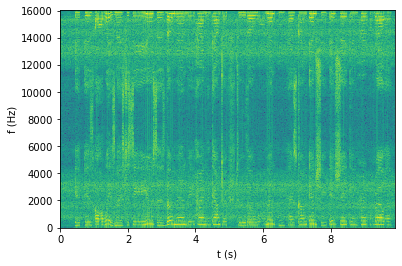

In [ ]:
document = 'mix.wav'

# x_length = len(xvect)
N_win = round(x_length/500)
N_hop = round(N_win/2)
N_fft = N_win
number_of_ffts = int(x_length/N_win)
t, f, matrix = tfct(document,N_win, N_hop, N_fft)

import seaborn as sns

def extents(f):
  delta = f[1] - f[0]
  return [f[0] - delta/2, f[-1] + delta/2]

plt.imshow(np.log10(matrix), aspect='auto', interpolation='none',
 extent = extents(t) + extents(f), origin='lower')

plt.xlabel('t (s)')
plt.ylabel('f (Hz)')
plt.show()

# Principe d’incertitude temps-fréquence

Principe d’incertitude temps-fréquence
Nous allons maintenant étudier les propriétés temps-fréquence à partir de l’analyse de Fourier
court-terme, donnant lieu au tracé d’un spectrogramme.
5. Après avoir chargé et écouté le fichier diapason.wav, analyser son contenu fréquentiel en
dB avec la fonction fft de la librairie numpy. Que constatez-vous ? Quelle est la fréquence
du son ? En déduire la note émise.

We will now study the "diapason.wav" file. When listening to it, we realize that it has a very uniform sound and doesn't mean much to us. You can see that it is a signal formed of few frequencies. The first step to understand this signal would be to understand what this frequency is.

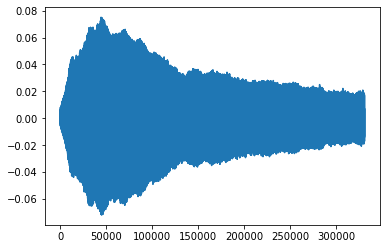

In [ ]:
document = 'diapason.wav'

xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

plt.plot(xvect)
sd.play(xvect, 15100)

7.5
44100


(400.0, 500.0)

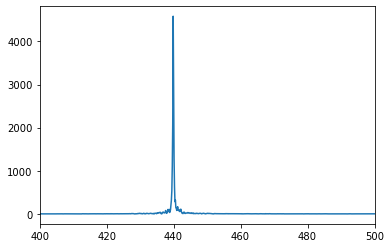

In [ ]:
document = 'diapason.wav'

import wave
import contextlib

with contextlib.closing(wave.open(document,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)
    print(rate)

xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

FT = abs(np.fft.fft(xvect - np.mean(xvect))/len(xvect))

FT = FT[:500]

fft_xvect = fft(xvect)

# fft_xvect = fft_xvect[:400]

plt.plot(np.linspace(0, rate, len(fft_xvect)), abs(fft_xvect))
plt.xlim(400, 500)


We can see that the most pronounced frequency in the signal is the frequency of 440 Hz (La).

All other frequency values are very weak, as we could predict when listening to the sound.

We can do the same study, but now with the signal coming from "saxo.wav"

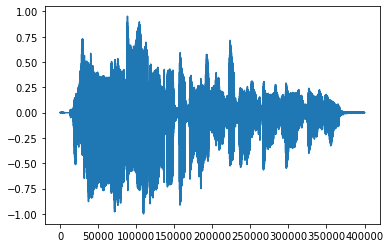

In [ ]:
document = 'saxo.wav'

xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

plt.plot(xvect)
sd.play(xvect, 44000)

in this one, we can see that it is no longer a uniform sound and we can deduce that it is composed of several different frequencies, in different intensities.

(0.0, 10000.0)

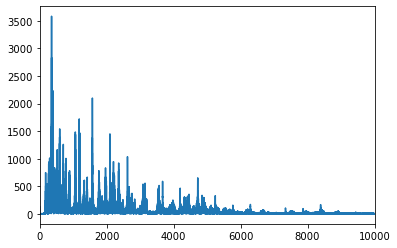

In [ ]:
document = 'saxo.wav'

import wave
import contextlib

with contextlib.closing(wave.open(document,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

FT = abs(np.fft.fft(xvect - np.mean(xvect))/len(xvect))

FT = FT[:500]

fft_xvect = fft(xvect)

# fft_xvect = fft_xvect[:400]

plt.plot(np.linspace(0, rate, len(fft_xvect)), abs(fft_xvect))
plt.xlim(0,10000)

Under these sounds, we can study the influence that changes in input variables have on the final result of the short time Fourier transform matrix.

The first simulation we will do will be to change the values of Nfft, keeping the values of Nwin = 1024 and Nhop = Nwin.

In [ ]:
with contextlib.closing(wave.open(document,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

def sec_to_trame(instant, N_hop, document ):
    with contextlib.closing(wave.open(document,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        
    trame = round((rate*instant)/(N_hop))
        
    return trame

number_of_ffts:  390
number_of_ffts:  390
number_of_ffts:  390
number_of_ffts:  390
number_of_ffts:  390


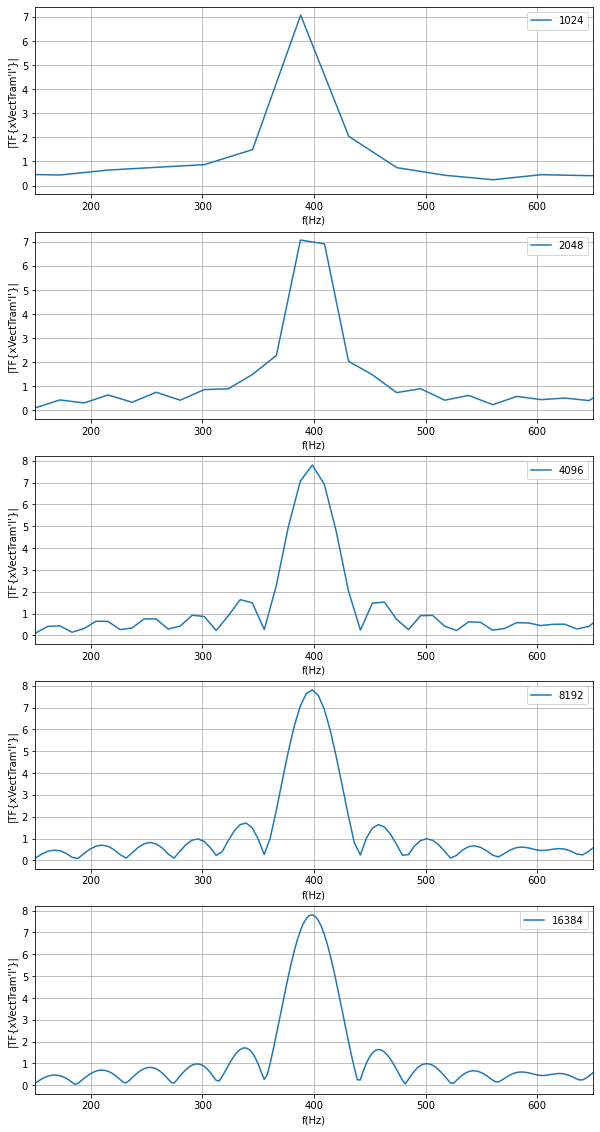

In [ ]:
Nwin = 1024
Nhop = Nwin
Nffts = [1024, 2048, 4096, 8192, 16384]
instant = 5.5
trame = len(xvect)*instant/duration

xvect = sf.read(document, dtype='float64')
xvect = xvect[0]

trame = xvect[round(trame-Nwin/2):round(trame+Nwin/2)]

fig, axs = plt.subplots(len(Nffts), figsize = (10,20))

for i, Nfft in enumerate(Nffts):
    t ,f, matrix = tfct(document, Nwin, Nhop, Nfft)    
    
    ax = axs[i]

    ax.plot(f ,matrix[:, sec_to_trame(1, Nhop, document)], label = Nfft )

    ax.grid(True)
    ax.set_xlabel("f(Hz)")
    ax.set_ylabel("|TF{xVectTram'l'}|")
    ax.legend()
    ax.set_xlim(150,650)
    
plt.legend()
plt.show()

Here, we can see the accuracy increasing, which is the density of frequency values plotted for the same number of samples of the signal. the bad part is that we start to have new "false little peaks"

Now we can also verify how changing the values of N_win would change the fourier transform of each span. 

Here, we continue to consider a variable N_fft, as before.

The values of nfft and nwin that will be considered are:
[128, 256, 512, 1024, 2048, 4096, 8192, 16384]

number_of_ffts:  3125
number_of_ffts:  1562
number_of_ffts:  781
number_of_ffts:  390
number_of_ffts:  195
number_of_ffts:  97
number_of_ffts:  48
number_of_ffts:  24


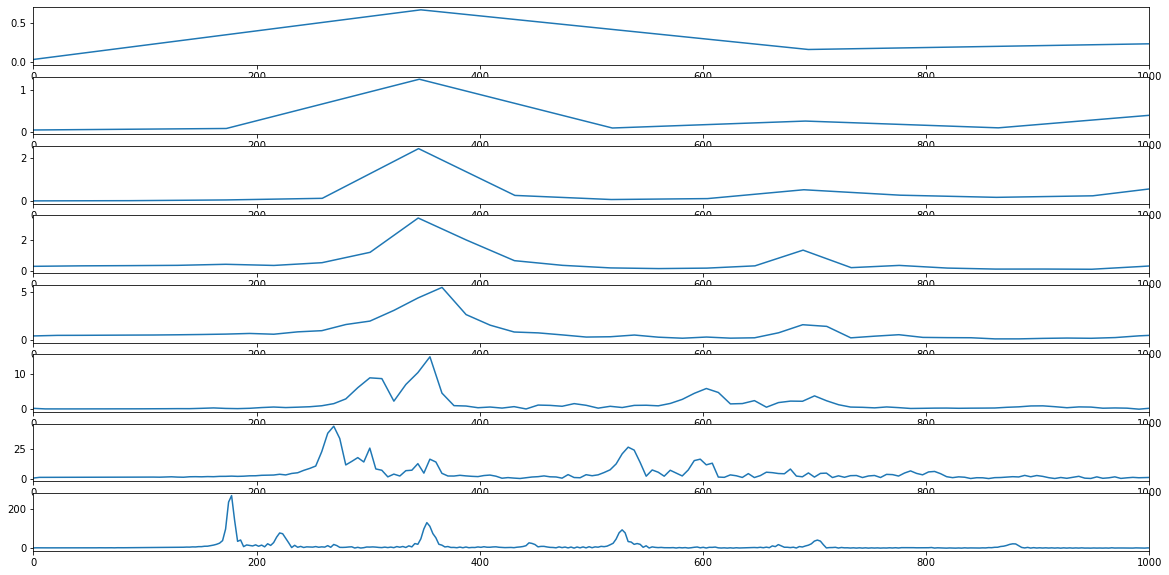

In [ ]:
Xs = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]

document = 'saxo.wav'

with contextlib.closing(wave.open(document,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()

fi, axs = plt.subplots(len(Xs), figsize = (20,10))

for i,X in enumerate(Xs):
    l = int(((0.86*rate) - abs(X - X))//X)

    ax = axs[i]
    t ,f, matrix = tfct(document, X, X, X)
    
    ax.plot(f ,matrix[:, sec_to_trame(7.5, X, document)], label = X)
    

    ax.set_xlim(0,1000)

# plt.legend()

Here, we can notice that the width of the windowing function relates to how the signal is represented—it determines whether there is good frequency resolution (frequency components close together can be separated) or good time resolution (the time at which frequencies change).